In [1]:
import pandas as pd

# loading the updated data so not to run the above cells
df_aldi = pd.read_csv('/home/ubuntu/Capstone/code/datasets/updated_data/updated_All_Data_Aldi.csv')

df_aldi.head()

,supermarket,price,per_unit_price,unit,names,date,category,own_brand,Week,Quantity,Revenue,day_of_week_num,week_of_month
0,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,2024-04-13,baby_products,False,15,6,18.54,5,2
1,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,2024-04-13,baby_products,False,15,7,21.63,5,2
2,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,2024-04-13,baby_products,False,15,7,21.63,5,2
3,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,2024-04-13,baby_products,False,15,5,15.45,5,2
4,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,2024-04-13,baby_products,False,15,7,21.63,5,2


In [14]:
# columns to be copied into a new dataframe
columnstoCopy_aldi = ['date', 'category', 'Revenue', 'day_of_week_num', 'week_of_month']
aldiSub_data = df_aldi[columnstoCopy_aldi].copy()

In [15]:

categories_aldi = [
    'meat_poultry_fish', 'other_food_cupboard', 'frozen', 'other_fresh_food', 
    'other_drinks', 'bakery', 'vegetables', 'cooking_essentials', 'fruits', 
    'other_household', 'pantry_staples', 'alcoholic_beverages', 'cold_beverages', 
    'personal_care', 'cleaning_supplies', 'pets', 'other_health_products', 
    'breakfast_items', 'baby_products', 'hot_beverages', 'free-from', 
    'medication', 'kitchen_essentials', 'coffee_and_tea_related'
]

# Defining a custom mapping dictionary
customMapping_aldi = {
    'meat_poultry_fish': 1,
    'other_food_cupboard': 2,
    'frozen': 3,
    'other_fresh_food': 4,
    'other_drinks': 5,
    'bakery': 6,
    'vegetables': 7,
    'cooking_essentials': 8,
    'fruits': 9,
    'other_household': 10,
    'pantry_staples': 11,
    'alcoholic_beverages': 12,
    'cold_beverages': 13,
    'personal_care': 14,
    'cleaning_supplies': 15,
    'pets': 16,
    'other_health_products': 17,
    'breakfast_items': 18,
    'baby_products': 19,
    'hot_beverages': 20,
    'free-from': 21,
    'medication': 22,
    'kitchen_essentials': 23,
    'coffee_and_tea_related': 24,
    'other_home_entertainment': 25,
    'music_film_games_books': 26,
    'bed_bath_home': 27,
    'travel_leisure': 28,
    'technology_electricals': 29,
    'garden_outdoor': 30,
    'non_alcoholic_beverages': 31,
    'partyware_gifting': 32,
}

# Applying custom mapping to categories
categoryNumericalCustom_aldi = [customMapping_aldi[cat] for cat in categories_aldi]

# Overwriting the content within the category column (changing from string to numerical)
aldiSub_data['category'] = aldiSub_data['category'].map(customMapping_aldi)

# Checking to see if the changes have been made
aldiSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month
0,2024-04-13,19,18.54,5,2
1,2024-04-13,19,21.63,5,2
2,2024-04-13,19,21.63,5,2
3,2024-04-13,19,15.45,5,2
4,2024-04-13,19,21.63,5,2


In [16]:
import numpy as np

# Sort DataFrame by 'date'
aldiSub_data.sort_values('date', inplace=True)

# sin and cosine components
aldiSub_data['sin_day'] = np.sin(2*np.pi*aldiSub_data['day_of_week_num']/7)
aldiSub_data['cos_day'] = np.cos(2*np.pi*aldiSub_data['day_of_week_num']/7)

# sine and cosine for week of the month
aldiSub_data['sin_week'] = np.sin(2*np.pi*aldiSub_data['week_of_month']/4)
aldiSub_data['cos_week'] = np.cos(2*np.pi*aldiSub_data['week_of_month']/4)

# Calculate the number of days since each category was last seen
aldiSub_data['Last_Seen_Days'] = aldiSub_data.groupby('category')['date'].transform(lambda x: x.diff().dt.days)

# Display the DataFrame
aldiSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days
6009057,2024-01-09,16,2.34,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
5967555,2024-01-09,20,69.93,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
5967554,2024-01-09,20,69.93,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
5967553,2024-01-09,20,49.95,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
5967552,2024-01-09,20,49.95,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0


In [17]:
aldiSub_data.dropna(inplace=True)
aldiSub_data['Last_Seen_Days'].value_counts()

Last_Seen_Days
0.0    6006863
1.0       2086
2.0         61
3.0         24
Name: count, dtype: int64

In [18]:
# Creating lags
#aldiSub_data.sort_values('date', inplace=True)  # Sort data by date if not already sorted
#aldiSub_data.set_index('date', inplace=True)
aldiSub_data.sort_index(inplace=True) 
#aldiSub_data.set_index('date', inplace=True)  # Set 'date' as index if you want to use date functionality

# Create lagged data columns
aldiSub_data['Revenue_lag1'] = aldiSub_data.groupby('category')['Revenue'].shift(1)
aldiSub_data['Revenue_lag2'] = aldiSub_data.groupby('category')['Revenue'].shift(2)
aldiSub_data['Revenue_lag3'] = aldiSub_data.groupby('category')['Revenue'].shift(3)
#aldiSub_data['sin_day_lag1'] = aldiSub_data.groupby('category')['sin_day'].shift(1)
#aldiSub_data['cos_day_lag1'] = aldiSub_data.groupby('category')['cos_day'].shift(1)
#aldiSub_data['sin_week_lag1'] = aldiSub_data.groupby('category')['sin_week'].shift(1)
#aldiSub_data['cos_week_lag1'] = aldiSub_data.groupby('category')['cos_week'].shift(1)

#df['Revenue_change'] = (df['Revenue'] - df['Revenue_lag1'])/df['Revenue_lag1']

# Calcul#ate the 7-day rolling mean
#aldiSub_data['weekly_rolling_avg'] = aldiSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).mean()

# Calculate the 7-day rolling standard deviation
#aldiSub_data['weekly_rolling_std'] = aldiSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).std()

#print(aldiSub_data[['weekly_rolling_avg', 'weekly_rolling_std']])

# Resample data to weekly frequency, calculate mean and std for each week
#weekly_data = aldiSub_data.resample('W').agg({'Revenue_lag1': ['mean', 'std']})
#weekly_data.columns = ['weekly_avg', 'weekly_std']  # Flatten the column hierarchy
#print(weekly_data)

# Handle any NaN values that arise from shifting
aldiSub_data.fillna(0, inplace=True)  # You may choose to handle NaNs differently based on your context

# Now your DataFrame includes lagged variables
aldiSub_data

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3
0,2024-04-13,19,18.54,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,0.00,0.00,0.00
1,2024-04-13,19,21.63,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,18.54,0.00,0.00
2,2024-04-13,19,21.63,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,21.63,18.54,0.00
3,2024-04-13,19,15.45,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,21.63,21.63,18.54
4,2024-04-13,19,21.63,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,15.45,21.63,21.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009052,2024-01-09,16,2.73,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.73,2.73,2.34
6009053,2024-01-09,16,2.34,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.73,2.73,2.73
6009054,2024-01-09,16,2.34,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.34,2.73,2.73
6009055,2024-01-09,16,1.95,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.34,2.34,2.73


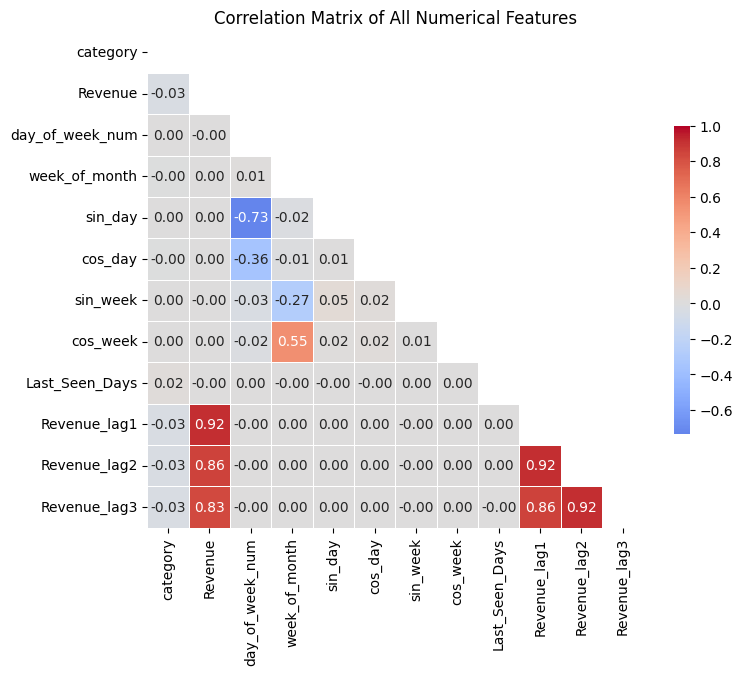

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix for all columns except 'date' as it's datetime
numerical_aldiSub_data = aldiSub_data.select_dtypes(include=[np.number])
corr = numerical_aldiSub_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title and format axes
plt.title('Correlation Matrix of All Numerical Features')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [20]:
# This function is used to reduce memory of a pandas dataframe
# The idea is cast the numeric type to another more memory-effective type
# For ex: Features "age" should only need type='np.int8'
# Source: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [21]:
reduced_aldi = reduce_mem_usage(aldiSub_data)
reduced_aldi.head()

Memory usage of dataframe is 618.91 MB
Memory usage after optimization is: 212.03 MB
Decreased by 65.7%


,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3
0,2024-04-13,19,18.546875,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,0.000000,0.000000,0.000000
1,2024-04-13,19,21.625000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,18.546875,0.000000,0.000000
2,2024-04-13,19,21.625000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,18.546875,0.000000
3,2024-04-13,19,15.453125,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,21.625000,18.546875
4,2024-04-13,19,21.625000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,15.453125,21.625000,21.625000


In [22]:
import pandas as pd

# Assuming 'reduced_aldi' is your original DataFrame

# Sample 10% of the data without replacement for the sampled data
sampled_df = reduced_aldi.sample(frac=0.05, random_state=42)

# Get the indices of the sampled data
sampled_indices = sampled_df.index

# Display the size of the original and sampled dataframes
print(f"Original Data Size: {len(reduced_aldi)}")
print(f"Sampled Data Size: {len(sampled_df)}")


Original Data Size: 6009034
Sampled Data Size: 300452


In [23]:
import pandas as pd

# Randomly sample 100 data points to create the test set
test_set_df = reduced_aldi.sample(n=15500, random_state=42)

# Display the size of the test set to confirm it contains exactly 100 data points
print(f"Test Set Data Size: {len(test_set_df)}")

Test Set Data Size: 15500


In [ ]:
'''

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Extract the features (X) and target variable (y)
X = sampled_df.drop(['date', 'Revenue'], axis=1)  # Features
y = sampled_df['Revenue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Assuming test_set_df needs to have categorical variables encoded:
test_set_df = pd.get_dummies(test_set_df, columns=['category'], drop_first=True)

# Align test set with the training set features
X_test_set = test_set_df.reindex(columns=X.columns, fill_value=0)
y_test_set = test_set_df['Revenue']  # Ensure there is a Revenue column

# Predict the Revenue using the RandomForest model
y_test_set_pred = rf.predict(X_test_set)

# Calculate MSE and R^2 for the test set predictions
mse_test = mean_squared_error(y_test_set, y_test_set_pred)
r2_test = r2_score(y_test_set, y_test_set_pred)

print(f"Test Set Mean Squared Error: {mse_test}")
print(f"Test Set R^2 Score: {r2_test}")

print(X.columns)
'''

KeyboardInterrupt: 

In [ ]:
'''
import pandas as pd

# Randomly sample 100 data points to create the test set
test_set_df = reduced_aldi.sample(n=100, random_state=42)

# Display the size of the test set to confirm it contains exactly 100 data points
print(f"Test Set Data Size: {len(test_set_df)}")
'''

'\nimport pandas as pd\n\n# Randomly sample 100 data points to create the test set\ntest_set_df = reduced_aldi.sample(n=100, random_state=42)\n\n# Display the size of the test set to confirm it contains exactly 100 data points\nprint(f"Test Set Data Size: {len(test_set_df)}")\n'

,Description,Value
0,Session id,123
1,Target,Revenue
2,Target type,Regression
3,Original data shape,"(300452, 13)"
4,Transformed data shape,"(300452, 15)"
5,Transformed train set shape,"(210316, 15)"
6,Transformed test set shape,"(90136, 15)"
7,Numeric features,11
8,Date features,1
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7140,21.5425,4.6414,0.8901,0.2448,0.1779
1,1.7000,20.5199,4.5299,0.8909,0.2375,0.1673
2,1.6634,18.2971,4.2775,0.9031,0.2299,0.1605
3,1.7386,21.3348,4.6190,0.8842,0.2496,0.1808
4,1.7236,21.2528,4.6101,0.8870,0.2418,0.1765
5,1.6924,19.5446,4.4209,0.8882,0.2459,0.1782
6,1.7114,21.8978,4.6795,0.8835,0.2450,0.1770
7,1.6554,18.6538,4.3190,0.8918,0.2420,0.1745
8,1.6670,18.0964,4.2540,0.9005,0.2376,0.1719


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0332,8.1297,2.8513,0.9579,0.1668,0.1058


              date  category  day_of_week_num  week_of_month   sin_day  \
1710771 2024-03-17         1                6              3 -0.781738   
5482461 2024-01-17         4                2              3  0.975098   
5453113 2024-01-17         3                2              3  0.975098   
4096611 2024-02-09         1                4              2 -0.433838   
1298807 2024-03-25         6                0              4  0.000000   

          cos_day  sin_week  cos_week  Last_Seen_Days  Revenue_lag1  \
1710771  0.623535      -1.0      -0.0             0.0      6.230469   
5482461 -0.222534      -1.0      -0.0             0.0      5.531250   
5453113 -0.222534      -1.0      -0.0             0.0      5.820312   
4096611 -0.900879       0.0      -1.0             0.0      5.949219   
1298807  1.000000      -0.0       1.0             0.0     13.140625   

         Revenue_lag2  Revenue_lag3    Revenue  prediction_label  
1710771      5.339844      5.339844   6.230469          6.251

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

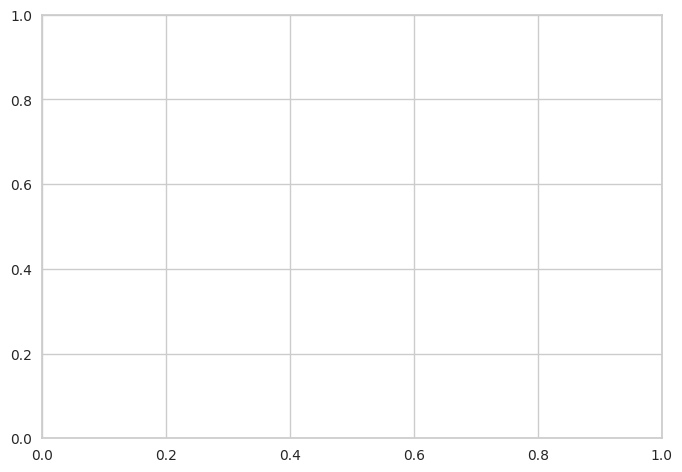

In [25]:

from pycaret.regression import *

# Assume 'df' is your DataFrame and 'target_column' is the name of your target column
# Set up the PyCaret environment
setup_data = setup(data=sampled_df, target='Revenue', session_id=123)

# Create a Random Forest model
rf_model = create_model('rf')

# Evaluate the model's performance visually
evaluate_model(rf_model)

# Assuming 'new_data' is your new DataFrame without the target column
predictions = predict_model(rf_model, data=test_set_df)
print(predictions.head())


In [35]:
from pycaret.regression import finalize_model, save_model

# Assuming `tuned_best_model` is your chosen model
final_model_aldi = finalize_model('rf')

# Save the model to disk
save_model(final_model_aldi, '/home/ubuntu/Capstone/code/best_models/final_model_aldi1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['category', 'day_of_week_num',
                                              'week_of_month', 'sin_day',
                                              'cos_day', 'sin_week', 'cos_week',
                                              'Last_Seen_Days', 'Revenue_lag1',
                                              'Revenue_lag2', 'Revenue_lag3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  RandomForestRegressor(n_jobs=-1, random_state=1

In [27]:
# Get the indices of the sampled data
sampled_indices = sampled_df.index

# Drop these indices from the original DataFrame to create the test set
test_set_df = reduced_aldi.drop(sampled_indices)

# Show the size of the test set
print(f"Test Set Data Size: {len(test_set_df)}")

Test Set Data Size: 5708582


In [36]:
from pycaret.regression import load_model, predict_model
import pandas as pd

# Load the model
model_path = '/home/ubuntu/Capstone/code/best_models/final_model_aldi1'
final_model_aldi = load_model(model_path)

# Assuming 'test_set_df' is already loaded and prepared
# Make sure test_set_df does not contain the target column if it's not needed for prediction

# Make predictions
predictions = predict_model(final_model_aldi, data=test_set_df)

# Print or save the predictions
predictions.head()

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.6160,30.7218,5.5427,0.8462,0.2354,0.1678


,date,category,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,Revenue,prediction_label
1,2024-04-13,19,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,18.546875,0.000000,0.000000,21.625000,17.802031
2,2024-04-13,19,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,18.546875,0.000000,21.625000,21.995391
3,2024-04-13,19,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,21.625000,18.546875,15.453125,17.576536
4,2024-04-13,19,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,15.453125,21.625000,21.625000,21.625000,21.594219
5,2024-04-13,19,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,15.453125,21.625000,21.625000,21.054063


: 